In [1]:
from pathlib import Path
import os

In [2]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import rasterio
from matplotlib.colors import hex2color
import numpy as np
import cv2

In [3]:
from data import get_data_paths, display_samples, read_image, imshow
from processing import NDVI

In [4]:
path_toy_dataset_folder = '../flair/dataflair/'

images_path = sorted(list(get_data_paths(Path(path_toy_dataset_folder), 'IMG*.tif')), key=lambda x: int(x.split('_')[-1][:-4]))



/Users/Theo/Documents/Dépots Githubs/2023/inf573vegetalisation/flair/dataflair/flair_1_toy_aerial_test/D022_2021/Z3_NF/img/IMG_063812.tif
/Users/Theo/Documents/Dépots Githubs/2023/inf573vegetalisation/flair/dataflair/flair_1_toy_aerial_train/D072_2019/Z9_AA/img/IMG_049784.tif


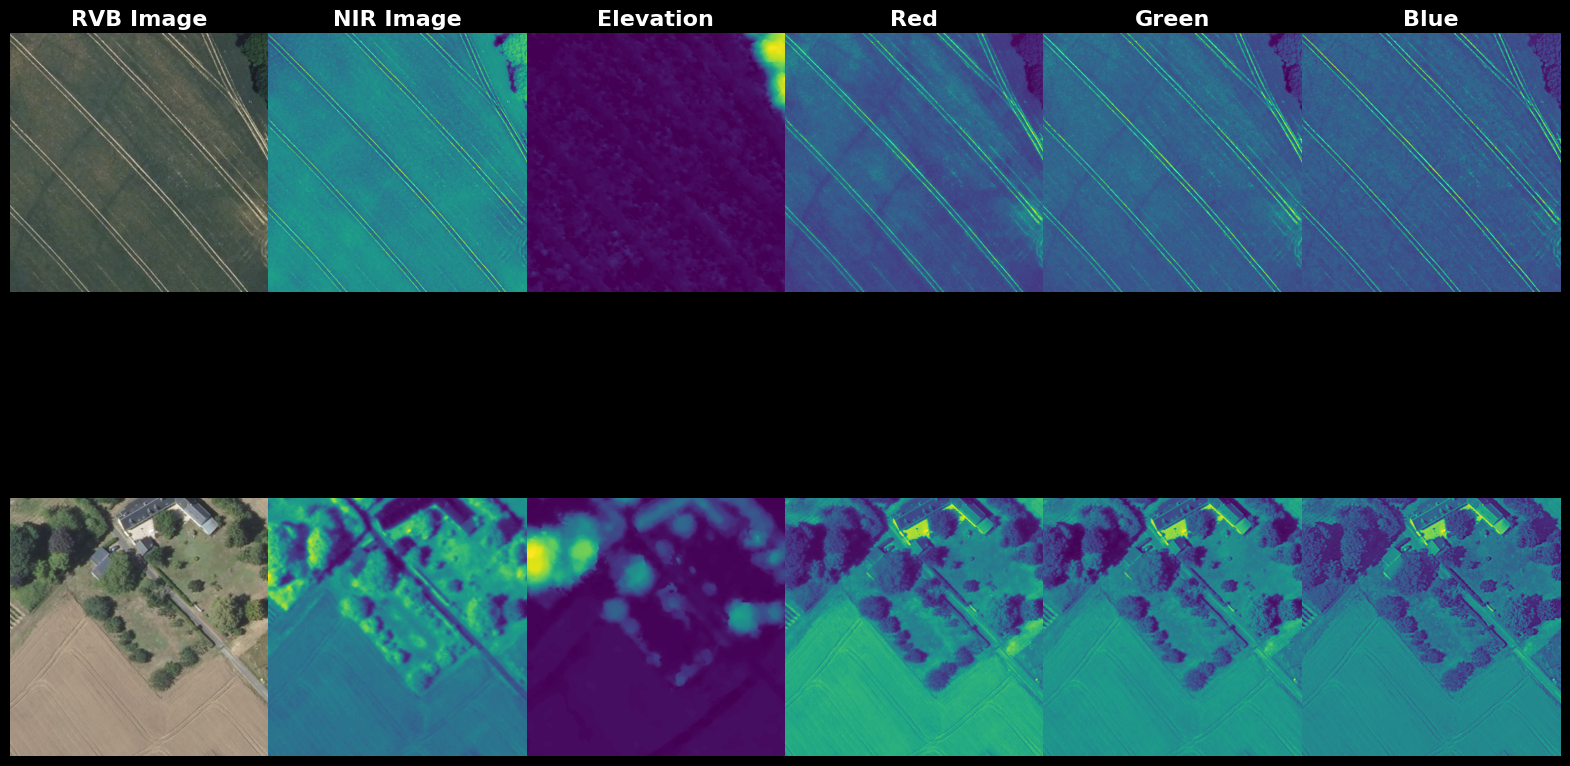

In [5]:
display_samples(images_path, nb_samples=2)

In [6]:
path_patient_zero = "/Users/Theo/Documents/Dépots Githubs/2023/inf573vegetalisation/flair/dataflair/flair_1_toy_aerial_test/D026_2020/Z13_UU/img/IMG_065011.tif"
image = read_image(path_patient_zero)


In [7]:
image.shape

(512, 512, 5)

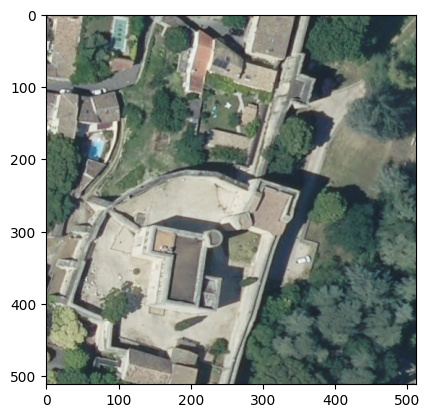

In [8]:
plt.imshow(image[:,:,:3])

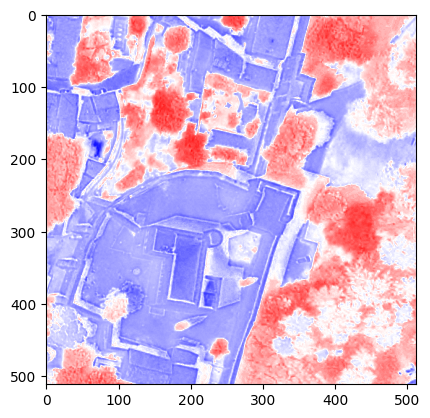

In [18]:


ndvi=NDVI(image)

min(ndvi.flatten()), max(ndvi.flatten())
imshow(image)
imshow(ndvi, cmap='bwr')

In [10]:
#### Flouter le 

### Flouter le NDVI

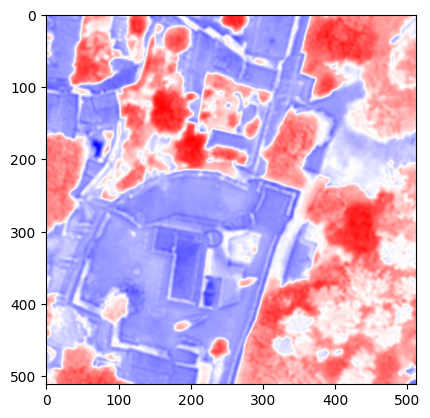

In [17]:
sigma = 1e3
ndvi_blurred=cv2.GaussianBlur(ndvi,(5,5) , sigmaX=sigma, sigmaY=sigma)
imshow(ndvi_blurred, cmap='bwr')

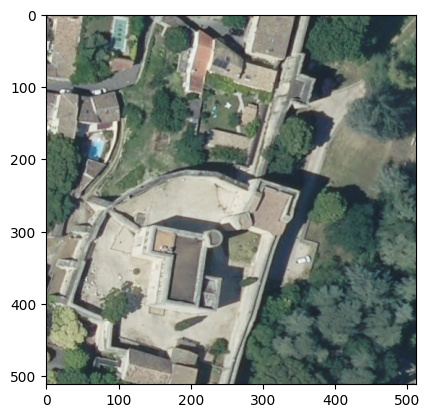

In [12]:
imshow(image)